In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm



# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [8]:
data.index = pd.to_datetime(data.index)
data.head()
data = data.dropna()
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [9]:
split_1 = int(len(data)*0.6)
split_2 = int(len(data)*0.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2 : ]

In [10]:
X_in = data_in.iloc[:, 1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:, 1:]
y_out = data_out.iloc[:,0]
X_hold = data_out.iloc[:,1:]
y_hold = data_out.iloc[:,0]

In [11]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold) 

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [12]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [13]:
import matplotlib.pyplot as plt

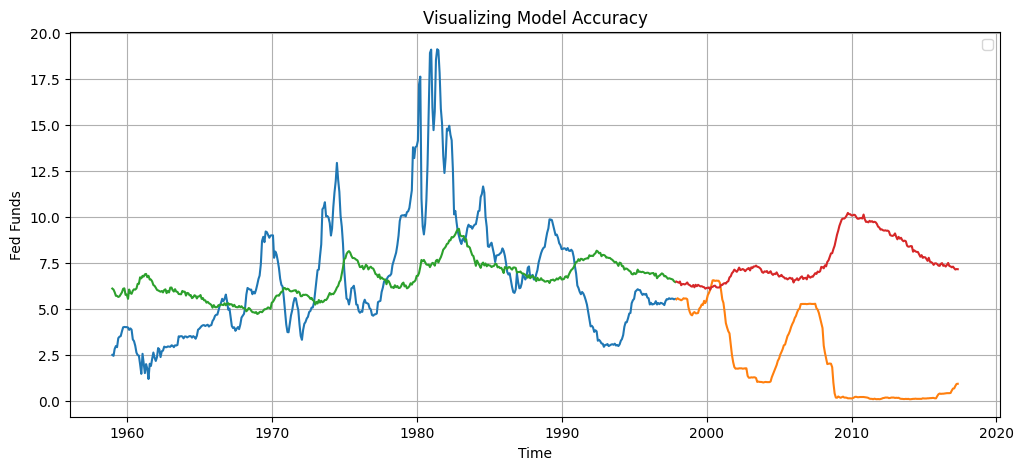

In [14]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [17]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
max_degrees = 3

Degree: 1


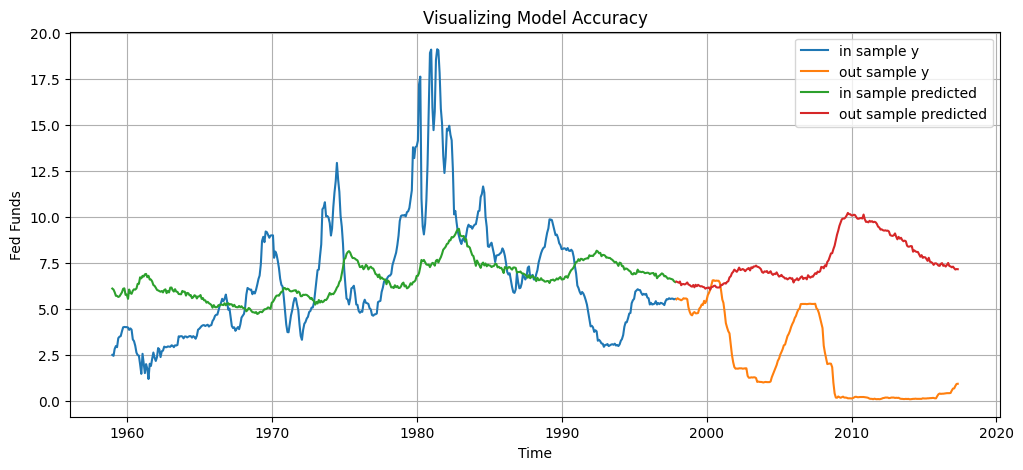

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565204
Degree: 2


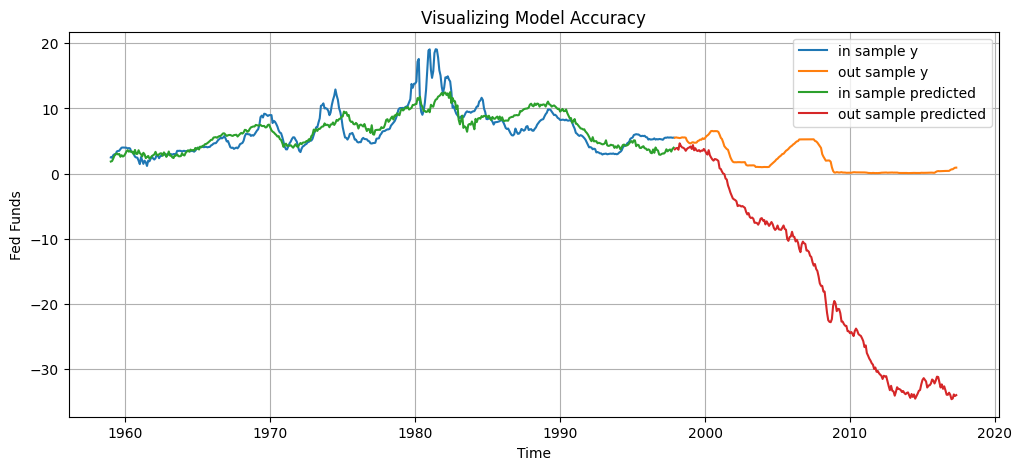

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099024405
Degree: 3


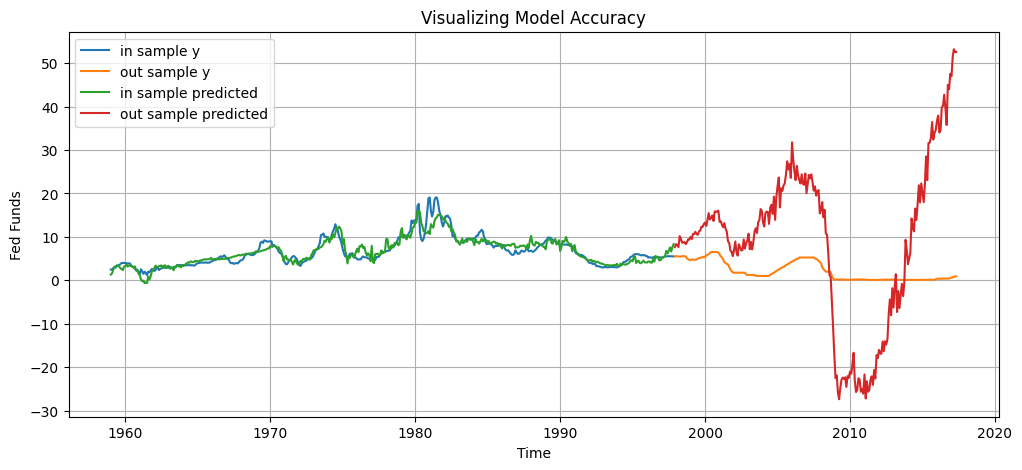

Insample MSE :  1.8723636288250916
Outsample MSE :  371.7672642959744


In [23]:
for degrees in range(1, max_degrees+1):
    print("Degree:",degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in,X_in_poly).fit()
    
    plt.figure(figsize=(12,5))
    
    predin = model1.predict(X_in_poly)
    predin = pd.DataFrame(predin, index = y_in.index)
    predout = model1.predict(X_out_poly)
    predout = pd.DataFrame(predout, index = y_out.index)
    
    plt.plot(y_in, label = "in sample y")
    plt.plot(y_out, label = "out sample y")
    plt.plot(predin, label = "in sample predicted")
    plt.plot(predout, label = "out sample predicted")
    
    plt.title("Visualizing Model Accuracy")
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.legend()
    plt.grid()
    plt.show()
    
    inmse1 = mean_squared_error(model1.predict(X_in_poly),y_in)
    outmse1 = mean_squared_error(model1.predict(X_out_poly),y_out)
    
    print("Insample MSE : ", inmse1)
    print("Outsample MSE : ", outmse1)

# 7.) State your observations :

We can see all the predicted models with different degrees from 1 to 3. Model with 1 degree predicts both the in and out sample poorly. The model with 2 degree predicts the in sample precisely. The model with 3 degree predicts the in sample precisely. We can see that the models don't predict it accurately for the in or out data. From the mse values, we can say that for the degree two and three in sample predicted is better. But for the rest its not. We can say that the increase in MSE indicates overfitting. 